In [2]:
# check ground classfication 
import glob
txts = glob.glob('../quality/USGS*.txt')
txts[1]

'../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1465n0426.txt'

In [8]:
len(txts)

87

In [11]:
def check_ground_string(file_path):
    try:
        with open(file_path, 'r') as file:
            for line in file:
                if 'ground' in line:
                    return True
        return False
    except FileNotFoundError:
        print("File not found.")
        return False
n=0
for f in txts:
    if check_ground_string(f):
        pass
        #print("The file contains the string 'ground'.")
    else:
        n+=1
        print(f)
print(n)

../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1461n0419.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1460n0419.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1467n0421.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1460n0420.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1458n0421.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1462n0420.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1459n0419.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1459n0421.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1458n0419.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1458n0420.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1460n0423.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1459n0420.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1463n0421.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1463n0427.txt
../quality/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1470n0421.txt
../quality/USGS_LPC_FL_WestEvergladesNP_

In [12]:
10,000,000

10000000

In [20]:
import subprocess

# Command to be executed
command = "wine $LASTOOLS/lasinfo.exe -h"  # Example command, replace it with your desired command
# Execute the command
result = subprocess.run(command, shell=True, capture_output=True, text=True)

In [31]:
def dtm_function(file):
    # Define the command as a list of arguments
    command = " ".join([
        "wine",
        "$LASTOOLS/blast2dem.exe",
        "-i",
        file,
        "-keep_class",
        "2",
        "-thin_with_grid",
        "0.5",
        "-step",
        "1.0",
        "-odir",
        "../tiles_dtms",
        "-otif"
    ])
    print(command )
    # Execute the command
    subprocess.run(command, shell=True, capture_output=True, text=True)

In [32]:
dtm_function('../LazData/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1499n0427.laz')

wine $LASTOOLS/blast2dem.exe -i ../LazData/USGS_LPC_FL_WestEvergladesNP_2018_B18_e1499n0427.laz -keep_class 2 -thin_with_grid 0.5 -step 1.0 -odir ../tiles_dtms -otif


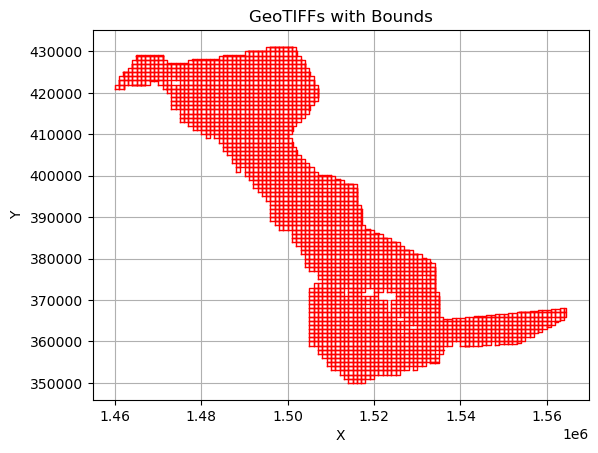

In [39]:
# check tif bounds 
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
import glob
# Define a list of GeoTIFF file paths
geotiff_files = glob.glob('../result/dtm_transform/*.tif') # Add your GeoTIFF file paths here

# Initialize lists to store bounding box coordinates
lefts, bottoms, rights, tops = [], [], [], []

# Extract bounding box coordinates for each GeoTIFF
for file_path in geotiff_files:
    with rasterio.open(file_path) as src:
        bounds = src.bounds
        if bounds.left < 1.4*1e6: 
            print(file_path)
        lefts.append(bounds.left)
        bottoms.append(bounds.bottom)
        rights.append(bounds.right)
        tops.append(bounds.top)

# # Plot GeoTIFFs
# 
# for file_path in geotiff_files:
#     with rasterio.open(file_path) as src:
#         rasterio.plot.show(src, ax=ax)

fig, ax = plt.subplots()
# Plot bounding boxes
for left, bottom, right, top in zip(lefts, bottoms, rights, tops):
    ax.plot([left, right, right, left, left], [bottom, bottom, top, top, bottom], color='red', linewidth=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('GeoTIFFs with Bounds')
ax.grid(True)
plt.show()